<a href="https://colab.research.google.com/github/bidishaaiml/Credit-Card-Fraud-/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
corr_matrix=df.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [ ]:
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

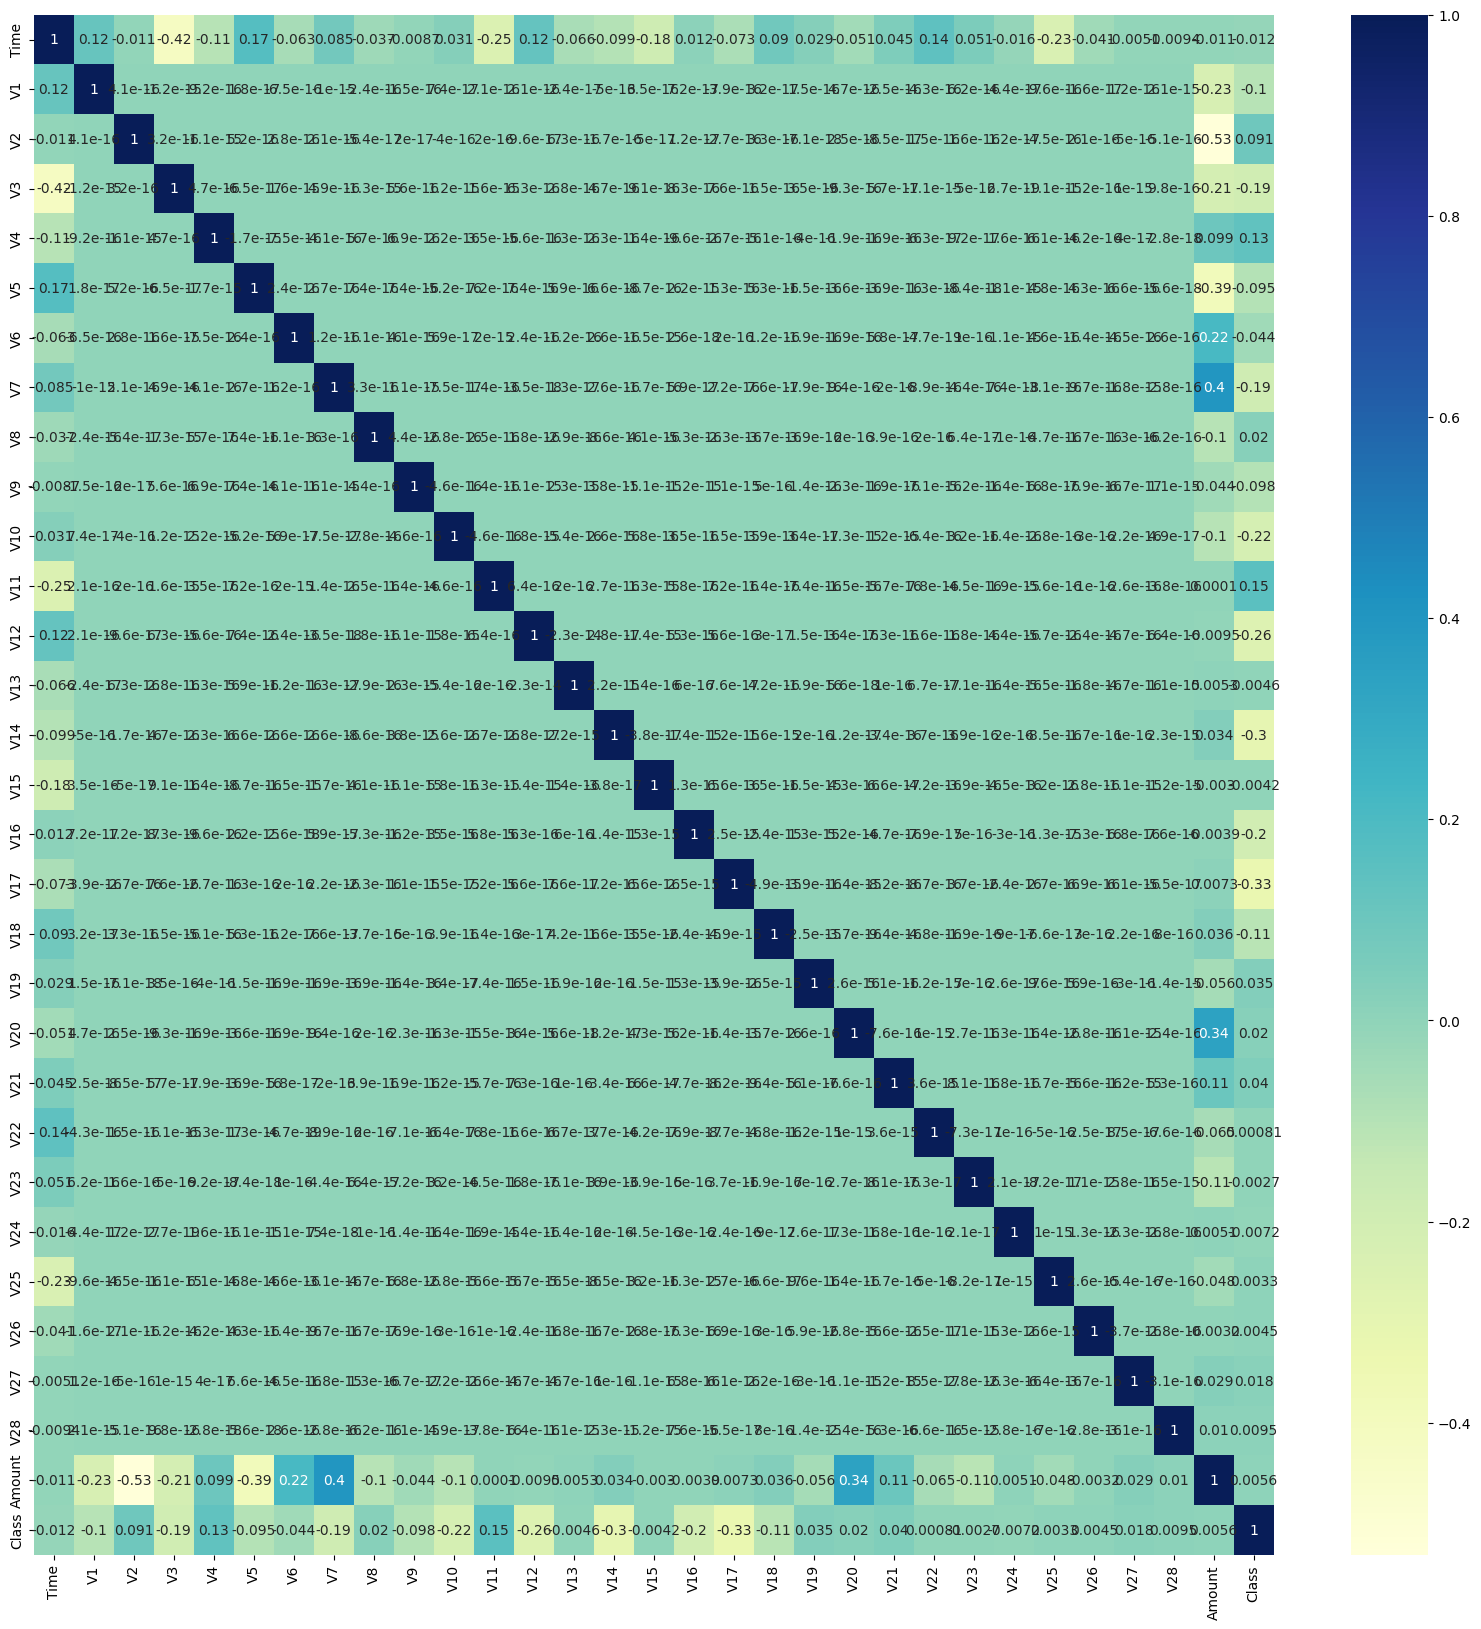

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df.duplicated().any()
df=df.drop_duplicates()

In [ ]:
df.drop(["Time"],axis=1,inplace=True)

<ipython-input-239-3fefd4be8fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Time"],axis=1,inplace=True)


In [ ]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

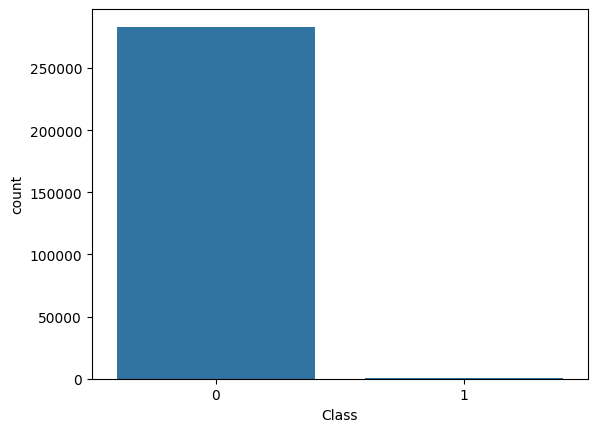

In [ ]:
sns.countplot(x="Class",data=df)
plt.show()

In [ ]:
df.groupby("Class").mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [ ]:
sc=StandardScaler()
df["Amount"]=sc.fit_transform(pd.DataFrame(df["Amount"]))
#df["Time"]=sc.fit_transform(pd.DataFrame(df["Time"]))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [ ]:
non_fraudulent=df[df.Class==0]
fraudulent=df[df.Class==1]

In [ ]:
non_fraudulent.shape

(283253, 30)

In [ ]:
fraudulent.shape

(473, 30)

In [ ]:
non_fraudulent.Amount.describe()

count    283253.000000
mean         -0.000236
std           0.999920
min          -0.353327
25%          -0.330683
50%          -0.265467
75%          -0.043981
max         102.247564
Name: Amount, dtype: float64

In [ ]:
fraudulent.Amount.describe()

count    473.000000
mean       0.141371
std        1.039186
min       -0.353327
25%       -0.349333
50%       -0.314109
75%        0.069558
max        8.136603
Name: Amount, dtype: float64

In [ ]:
non_fraudulent_sample=non_fraudulent.sample(n=473)

In [ ]:
new_dataset=pd.concat([non_fraudulent_sample,fraudulent],axis=0)

In [ ]:
new_dataset.shape

(946, 30)

In [ ]:
new_dataset["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby("Class").mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.013457,0.042586,-0.000183,0.047945,0.065045,-0.072832,0.074710,0.015498,0.070075,0.029156,...,0.031365,-0.013156,-0.014764,-0.043095,-0.036610,-0.020200,-0.043266,0.000512,0.000812,0.010360
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.141371


In [ ]:
X=new_dataset.drop("Class",axis=1)
Y=new_dataset["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction1 = model1.predict(X_train)
training_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy1)

Accuracy on Training data :  0.9537037037037037


In [ ]:
# accuracy on test data
X_test_prediction1 = model1.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy1)

Accuracy score on Test Data :  0.9526315789473684


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, X_test_prediction1)

array([[88,  0],
       [ 9, 93]])

In [ ]:
print("Precision:",metrics.precision_score(Y_test, X_test_prediction1))
print("Recall:",metrics.recall_score(Y_test, X_test_prediction1))
print("F1-score:",metrics.f1_score(Y_test, X_test_prediction1))

Precision: 1.0
Recall: 0.9117647058823529
F1-score: 0.9538461538461539


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model2.fit(X_train, Y_train)

#Predict the response for test dataset
X_test_prediction2 = model2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, X_test_prediction2)

array([[88,  0],
       [ 9, 93]])

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, X_test_prediction2))

Accuracy: 0.9526315789473684


In [ ]:
print("Precision:",metrics.precision_score(Y_test, X_test_prediction2))
print("Recall:",metrics.recall_score(Y_test, X_test_prediction2))
print("F1-score:",metrics.f1_score(Y_test, X_test_prediction2))

Precision: 1.0
Recall: 0.9117647058823529
F1-score: 0.9538461538461539


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
X_test_prediction3=model3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, X_test_prediction3))

Accuracy: 0.8789473684210526


In [ ]:
print("Precision:",metrics.precision_score(Y_test, X_test_prediction3))
print("Recall:",metrics.recall_score(Y_test, X_test_prediction3))
print("F1-score:",metrics.f1_score(Y_test, X_test_prediction3))

Precision: 0.883495145631068
Recall: 0.8921568627450981
F1-score: 0.8878048780487806


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
X_test_prediction4=model4.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, X_test_prediction4))

Accuracy: 0.9315789473684211


In [ ]:
print("Precision:",metrics.precision_score(Y_test, X_test_prediction4))
print("Recall:",metrics.recall_score(Y_test, X_test_prediction4))
print("F1-score:",metrics.f1_score(Y_test, X_test_prediction4))

Precision: 0.978494623655914
Recall: 0.8921568627450981
F1-score: 0.9333333333333333


In [ ]:
final_data=pd.DataFrame({"Models":["LR","SVM","DT","RF"],
                         "ACC":[accuracy_score(Y_test,X_test_prediction1)*100,
                                accuracy_score(Y_test,X_test_prediction2)*100,
                                accuracy_score(Y_test,X_test_prediction3)*100,
                                accuracy_score(Y_test,X_test_prediction4)*100,
                                ]})

In [ ]:
final_data

,Models,ACC
0,LR,95.263158
1,SVM,95.263158
2,DT,87.894737
3,RF,93.157895


<ipython-input-274-089b119057ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data["Models"],y=final_data["ACC"],palette="Set2")


<Axes: xlabel='Models', ylabel='ACC'>

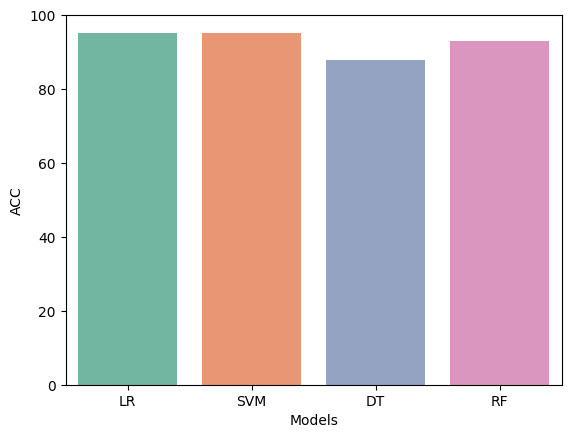

In [ ]:
sns.barplot(x=final_data["Models"],y=final_data["ACC"],palette="Set2")